In [5]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [6]:
# See the first 5 rows
print("First 5 rows of the dataset:")
print(diabetes_dataset.head())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
# Get the number of rows and columns
print("\nShape of the dataset:", diabetes_dataset.shape)


Shape of the dataset: (768, 9)


In [8]:

# Get statistical measures
print("\nStatistical Description:")
print(diabetes_dataset.describe())


Statistical Description:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      

In [9]:
# Check the distribution of the Outcome variable
print("\nOutcome distribution (0 = Non-Diabetic, 1 = Diabetic):")
print(diabetes_dataset['Outcome'].value_counts())


Outcome distribution (0 = Non-Diabetic, 1 = Diabetic):
Outcome
0    500
1    268
Name: count, dtype: int64


In [10]:
# Separate the data (X) and the labels (Y)
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [11]:

# Standardize the data to a common scale
scaler = StandardScaler()

In [12]:
# The fit_transform method calculates the mean/std and applies the transformation in one step
standardized_data = scaler.fit_transform(X)

In [13]:

# Update X with the standardized data
X = standardized_data

In [14]:
# Split the data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print("Shape of original data:", X.shape)
print("Shape of training data:", X_train.shape)
print("Shape of test data:", X_test.shape)

Shape of original data: (768, 8)
Shape of training data: (614, 8)
Shape of test data: (154, 8)


In [15]:
# Create the Support Vector Machine (SVM) classifier
classifier = svm.SVC(kernel='linear')

# Train the model using the training data
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [16]:
# Check accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(f'Accuracy score on the training data: {training_data_accuracy:.2%}')

# Check accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(f'Accuracy score on the test data: {test_data_accuracy:.2%}')

Accuracy score on the training data: 78.66%
Accuracy score on the test data: 77.27%


In [17]:
# 1. Import all necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm

# 2. Load and prepare the data
try:
    # Make sure 'diabetes.csv' is in the correct path for your environment
    diabetes_dataset = pd.read_csv('/content/diabetes.csv')
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please ensure the file is uploaded correctly.")
    # This will stop the script if the file isn't found
    exit()

X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=20)

# 3. Define, train, and evaluate the models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', C=1.0, random_state=20),
    'Support Vector Machine': svm.SVC(kernel='linear'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=20),
    'Gradient Boosting': GradientBoostingClassifier(random_state=20)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    results[model_name] = accuracy

# 4. Sort and print the final accuracy results
sorted_results = sorted(results.items(), key=lambda item: item[1], reverse=True)

print("--- Model Accuracy Comparison  ---")
for model_name, accuracy in sorted_results:
    # This loop prints each model's accuracy, formatted as a percentage
    print(f'{model_name}: {accuracy:.2%}')

print("---------------------------------------")

--- Model Accuracy Comparison  ---
Logistic Regression: 81.17%
Support Vector Machine: 80.52%
Random Forest: 77.92%
K-Nearest Neighbors: 75.97%
Gradient Boosting: 75.97%
---------------------------------------


--- Model Performance Comparison ---
                    Model  Accuracy  F1 Score  Precision    Recall
0     Logistic Regression  0.811688  0.801475   0.815488  0.811688
1  Support Vector Machine  0.805195  0.793757   0.809487  0.805195
3           Random Forest  0.779221  0.771671   0.774814  0.779221
2     K-Nearest Neighbors  0.759740  0.756839   0.755632  0.759740
4       Gradient Boosting  0.759740  0.750633   0.753709  0.759740

🏆 BEST MODEL IDENTIFIED 🏆

   Best Model: Logistic Regression
   F1 Score: 0.8015
   Test Accuracy: 0.8117


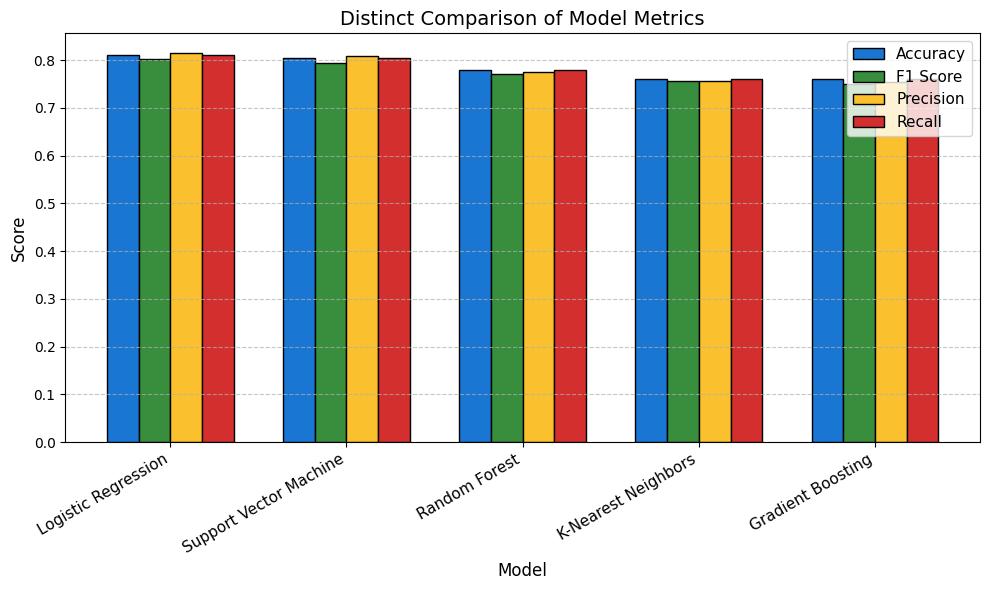

In [23]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm

# 2. Load and prepare the data
try:
    diabetes_dataset = pd.read_csv('/content/diabetes.csv')
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please ensure the file is uploaded correctly.")
    exit()

X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=20)

# 3. Define, train, and evaluate models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', C=1.0, random_state=20),
    'Support Vector Machine': svm.SVC(kernel='linear'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=20),
    'Gradient Boosting': GradientBoostingClassifier(random_state=20)
}

# Calculate all metrics
results = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred, average='weighted')
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    results[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    }

# Convert results to DataFrame and sort by F1 Score, then accuracy
metrics_df = pd.DataFrame.from_dict(results, orient='index').reset_index().rename(columns={'index':'Model'})
sorted_metrics_df = metrics_df.sort_values(by=['F1 Score','Accuracy'], ascending=False)

print("--- Model Performance Comparison ---")
print(sorted_metrics_df)

best_model_name = sorted_metrics_df.iloc[0]['Model']
best_model_f1 = sorted_metrics_df.iloc[0]['F1 Score']
best_model_accuracy = sorted_metrics_df.iloc[0]['Accuracy']

print("\n" + "="*35)
print("🏆 BEST MODEL IDENTIFIED 🏆")
print(f"\n   Best Model: {best_model_name}")
print(f"   F1 Score: {best_model_f1:.4f}")
print(f"   Test Accuracy: {best_model_accuracy:.4f}")
print("="*35)

# 5. Distinct Comparison Graph
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
models = sorted_metrics_df['Model'].tolist()
scores = [sorted_metrics_df[metric].tolist() for metric in metrics]
colors = ['#1976D2', '#388E3C', '#FBC02D', '#D32F2F']
x = np.arange(len(models))
bar_width = 0.18

plt.figure(figsize=(10,6))
for i, (metric, score) in enumerate(zip(metrics, scores)):
    plt.bar(x + i*bar_width, score, width=bar_width, color=colors[i], edgecolor='black', label=metric)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Distinct Comparison of Model Metrics', fontsize=14)
plt.xticks(x + 1.5*bar_width, models, rotation=30, ha='right', fontsize=11)
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


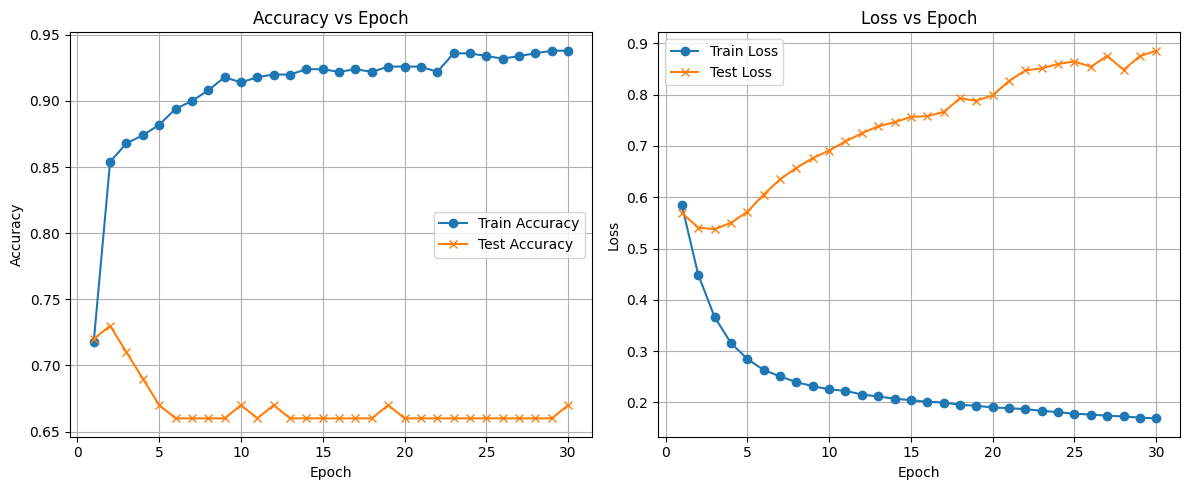

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Example: binary classification with synthetic data
# Replace with your own X_train, Y_train, X_test, Y_test
from sklearn.datasets import make_classification
X_train, Y_train = make_classification(n_samples=500, n_features=10, random_state=42)
X_test, Y_test = make_classification(n_samples=100, n_features=10, random_state=43)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train for multiple epochs and capture history
history = model.fit(X_train, Y_train, epochs=30, batch_size=16, validation_data=(X_test, Y_test), verbose=0)

# Plot accuracy and loss for each epoch
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Test Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Train Loss', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Test Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6630 - loss: 0.6538 - val_accuracy: 0.7792 - val_loss: 0.5763
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7458 - loss: 0.5801 - val_accuracy: 0.7922 - val_loss: 0.5112
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7183 - loss: 0.5381 - val_accuracy: 0.8182 - val_loss: 0.4650
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7755 - loss: 0.4970 - val_accuracy: 0.8182 - val_loss: 0.4421
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7856 - loss: 0.4735 - val_accuracy: 0.8052 - val_loss: 0.4303
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7827 - loss: 0.4652 - val_accuracy: 0.7987 - val_loss: 0.4248
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7731 - loss: 0.4671 - val_accuracy: 0.7857 - val_loss: 0.4208
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8084 - loss: 0.4190 - val_accuracy: 0.8117 - val_loss: 0.4144

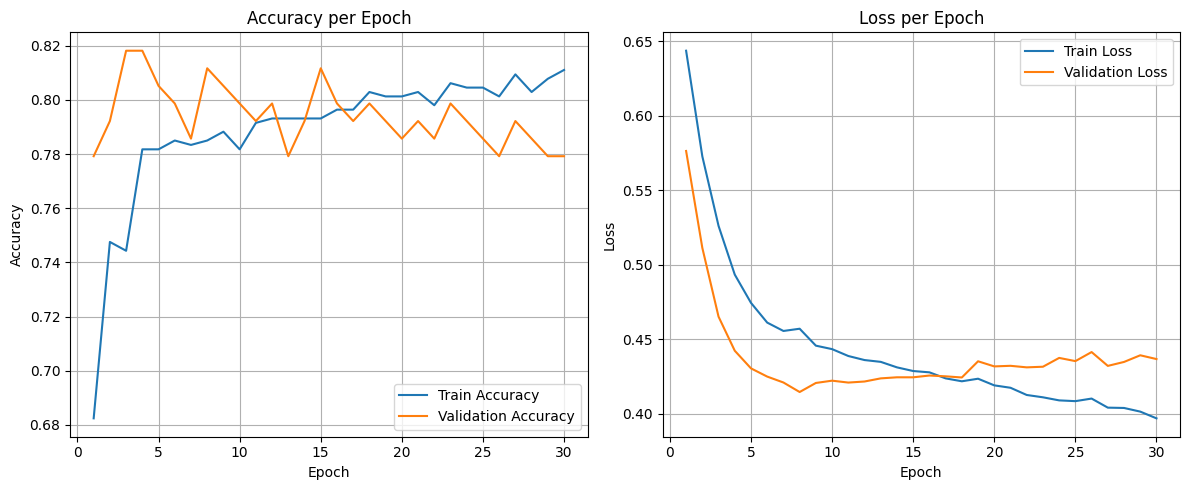

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess dataset
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=20)

# Define neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with epoch-wise metric recording
history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

# Convert history to DataFrame for easy viewing
history_df = pd.DataFrame(history.history)

# Plot accuracy and loss vs epoch
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history_df.index + 1, history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df.index + 1, history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_df.index + 1, history_df['loss'], label='Train Loss')
plt.plot(history_df.index + 1, history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [18]:
# Input data for a single new instance
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Convert to numpy array and reshape
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the new input data using the SAME scaler from before
std_data = scaler.transform(input_data_reshaped)

# Make a prediction
prediction = classifier.predict(std_data)

# Print the result
if (prediction[0] == 0):
  print('Prediction: The person is not diabetic.')
else:
  print('Prediction: The person is diabetic.')

Prediction: The person is diabetic.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
import pickle

In [20]:
filename = 'trained_model_diabetcis.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [21]:
# loading the saved model
loaded_model = pickle.load(open('trained_model_diabetcis.sav', 'rb'))

In [22]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
